In [1]:
# train,test, and valid set paths
TRAIN_PATH = 'C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\dataset\\train'
TEST_PATH = 'C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\dataset\\test'
VALID_PATH = 'C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\dataset\\validate'

In [2]:
pip install tensorflow-addons

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow_addons as tfa

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import cv2
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import warnings

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'r

In [5]:
# preprocessing/augmentation for ImageDataGenerator
def preprocesser(image):
    image= tf.image.adjust_contrast(image, 0.6)
    image = tfa.image.equalize(image)
    image = tf.image.rgb_to_grayscale(image)
    return image

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
train_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)
va_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)

training_data = train_datagenerator.flow_from_directory(TRAIN_PATH,target_size = IMAGE_SIZE,batch_size = 128,class_mode = 'categorical')
validation_data =  va_datagenerator.flow_from_directory(VALID_PATH,target_size=IMAGE_SIZE,batch_size = 128,class_mode='categorical')
testing_data = test_datagenerator.flow_from_directory(TEST_PATH,target_size = IMAGE_SIZE,batch_size = 64,class_mode = 'categorical')


Found 3436 images belonging to 5 classes.
Found 687 images belonging to 5 classes.
Found 458 images belonging to 5 classes.


In [8]:
from tensorflow import keras

In [9]:
from keras.applications.inception_v3 import InceptionV3

In [10]:
inc=InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [11]:
for i in inc.layers:
    i.trainable=False

In [12]:
from keras.layers.reshaping.flatten import Flatten
x=Flatten()(inc.output)

In [13]:
from keras.layers import Dense
pred=Dense(units=5,activation='softmax')(x)

In [14]:
model=Model(inputs=inc.input,outputs=pred)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint

filepath = 'C:\\Users\\DELL\\notebooks\\Notebooks\\diabetic\\tincweights.hdf5'
savedweights = ModelCheckpoint(filepath,monitor='val_loss',save_best_only=True,save_weights_only=True,mode='min',verbose=1)

hist = model.fit_generator( 
training_data ,
validation_data=validation_data , 
epochs=24,  
verbose = 1,callbacks =[savedweights]
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8948\3820730707.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/24
27/27 [==============================] - ETA: 0s - loss: 11.1341 - accuracy: 0.2573
Epoch 1: val_loss improved from inf to 5.71349, saving model to C:\Users\DELL\notebooks\Notebooks\diabetic\tincweights.hdf5
27/27 [==============================] - 225s 8s/step - loss: 11.1341 - accuracy: 0.2573 - val_loss: 5.7135 - val_accuracy: 0.3712
Epoch 2/24
27/27 [==============================] - ETA: 0s - loss: 2.8653 - accuracy: 0.3865
Epoch 2: val_loss improved from 5.71349 to 1.86615, saving model to C:\Users\DELL\notebooks\Notebooks\diabetic\tincweights.hdf5
27/27 [==============================] - 214s 8s/step - loss: 2.8653 - accuracy: 0.3865 - val_loss: 1.8661 - val_accuracy: 0.4323
Epoch 3/24
27/27 [==============================] - ETA: 0s - loss: 1.3828 - accuracy: 0.5172
Epoch 3: val_loss improved from 1.86615 to 1.46863, saving model to C:\Users\DELL\notebooks\Notebooks\diabetic\tincweights.hdf5
27/27 [==============================] - 214s 8s/step - loss: 1.3828 - accur

In [18]:
loss, acc=model.evaluate(testing_data)
print("Accuracy: ", acc*100)

8/8 [==============================] - 24s 3s/step - loss: 0.7793 - accuracy: 0.7467
Accuracy:  74.67249035835266


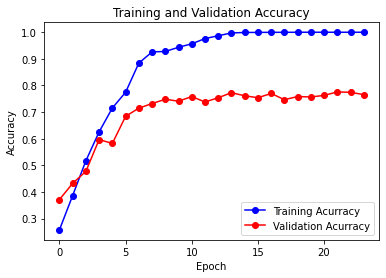

In [1]:
import matplotlib.pyplot as plt
train_acc=[0.2574, 0.3865,0.5172,0.6257,0.7154,0.7744, 0.8839,0.9261, 0.9278,0.9435,0.9566,0.9761,0.9869,0.9974,0.9991, 0.9994,0.9997,0.9997,1.0000, 1.0000,1.0000, 1.0000, 1.0000, 1.0000]
          
val_acc=  [0.3712,0.4323,0.4774,0.5968,0.5822,0.6841,0.7147,0.7322,0.7482,0.7409, 0.7584,0.7380,0.7540,0.7729,0.7613,0.7540,0.7700,0.7467,0.7584,0.7569,0.7627,0.7758,0.7744, 0.7656]

Epoch=range(1,4+1)
plt.plot(train_acc,'b-o',label='Training Acurracy')
plt.plot(val_acc,'r-o',label='Validation Acurracy')

Accuracy=0.746
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

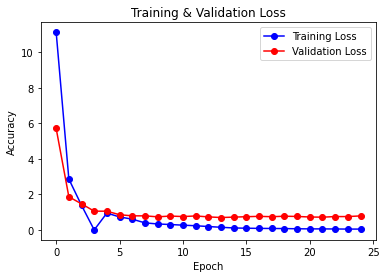

In [7]:
train_loss=[11.1341,2.8653,1.3828 ,0,.9484,0.7310,0.6057, 0.3971,0.3349,0.3033 ,0.2674 ,0.2340,0.1909 ,0.1479,0.1108 ,0.0958,0.0860,0.0811,0.0753,0.0644,0.0583, 0.0576, 0.0527,0.0469,0.0463]
val_loss=  [5.7135,1.8661 ,1.4686,1.0557,1.0551,0.8553,0.7927,0.7922,0.7371,0.7805, 0.7529,0.7865,0.7341, 0.6975 ,0.7205,0.7440,0.7642,0.7439,0.7712,0.7583 ,0.7276,0.7176,0.7517,0.7517,0.7890]
plt.plot(train_loss,'b-o',label='Training Loss')
plt.plot(val_loss,'r-o',label='Validation Loss')
Epoch=24
Accuracy=0.746
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()